In [5]:
# Installing imageai from github wheel
!pip install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl

In [2]:
import matplotlib.pyplot as plt

import cv2

In [3]:
from imageai.Prediction import ImagePrediction

prediction = ImagePrediction()

In [4]:
prediction.setModelTypeAsResNet()

In [5]:
prediction.setModelPath('resnet50_weights_tf_dim_ordering_tf_kernels.h5')

In [6]:
prediction.loadModel()

In [7]:
preds, probs = prediction.predictImage('car.jpg', result_count = 10)

In [8]:
for eachpred , eachprob in zip(preds, probs):
    print(eachpred , " : ", eachprob)

racer  :  51.072901487350464
sports_car  :  31.487131118774414
convertible  :  4.238360375165939
go-kart  :  2.5242526084184647
car_wheel  :  2.0263992249965668
lawn_mower  :  1.4354735612869263
pickup  :  1.1820130050182343
tricycle  :  0.8854666724801064
beach_wagon  :  0.5121422000229359
tow_truck  :  0.40513896383345127


In [9]:
from imageai.Detection import ObjectDetection

detector = ObjectDetection()

Using TensorFlow backend.


In [10]:
detector.setModelTypeAsRetinaNet()

In [11]:
detector.setModelPath('resnet50_coco_best_v2.0.1.h5')

In [12]:
detector.loadModel()

In [13]:
# Chair 1:
from matplotlib import patches

In [14]:
#Loading the chair image
chair1 = plt.imread('AnotherChair.jpg')

# Detecting the chair
extracted_objects = detector.detectObjectsFromImage(input_image="AnotherChair.jpg", output_type = 'array', extract_detected_objects=True, minimum_percentage_probability=30)

chair   box points : [113 103 333 471]


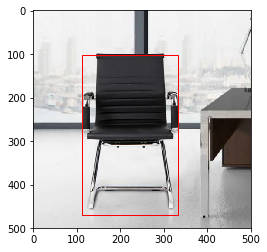

In [15]:
for obj in extracted_objects[1]:
    print(obj['name'], "  box points :", obj['box_points'])
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(chair1)
    # Create a Rectangle patch
    rect = patches.Rectangle((obj['box_points'][0],obj['box_points'][1]),obj['box_points'][2]-obj['box_points'][0],obj['box_points'][3]-obj['box_points'][1],linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()

In [88]:
# Chair 2:

In [16]:
# Loading image chair2
chair2 = plt.imread("AnotherChair3.jpg")
# Detecting the chair
extracted_objects_another = detector.detectObjectsFromImage(input_image="AnotherChair3.jpg", output_type = 'array', extract_detected_objects=True, minimum_percentage_probability=30)

book   box points : [  1 135  67 191]


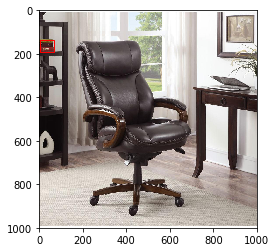

potted plant   box points : [833 149 998 336]


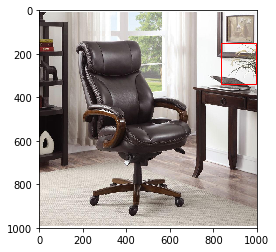

chair   box points : [161 123 709 926]


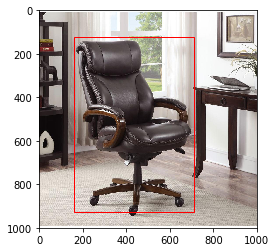

In [17]:
for obj in extracted_objects_another[1]:
    print(obj['name'], "  box points :", obj['box_points'])
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(chair2)
    # Create a Rectangle patch
    rect = patches.Rectangle((obj['box_points'][0],obj['box_points'][1]),obj['box_points'][2]-obj['box_points'][0],obj['box_points'][3]-obj['box_points'][1],linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()

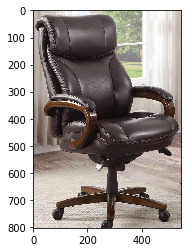

In [142]:
# Now replacing chair from chair1 with chari2
plt.imshow(chair2[123:926, 161:709])
plt.show()

Chair from image 1


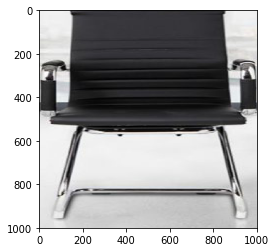

Chair from image2


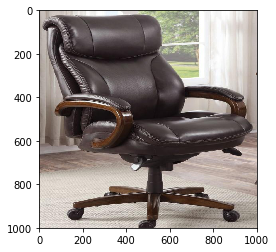

In [18]:
# Showing the two images with resizing to same:

chair1_box_cor = [113 ,103, 333, 471]
chair1_box = chair1[103:471, 113:333]
chair1_size = chair1.shape[:2]

chair2_box_cor = [161, 123, 709, 926]
chair2_box = chair2[123:926, 161:709]
chair2_size = chair2.shape[:2]

print("Chair from image 1")
plt.imshow(cv2.resize(chair1_box, chair2_size))
plt.show()

print('Chair from image2')
plt.imshow(cv2.resize(chair2_box, chair2_size))
plt.show()

In [19]:
# lets replace image 1 with chair in image2 

chair1_box_cor = [113 ,103, 333, 471]

chair1_box = chair1[103:471, 113:333]

chair1_size = chair1.shape[:2]

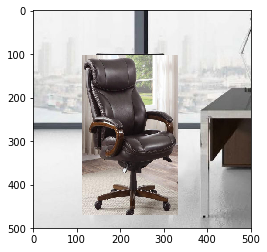

In [20]:
import numpy as np
temp = chair1
temp = np.array(temp)
temp_box = np.array(temp[103:471, 113:333])

temp[103:471, 113:333] = cv2.resize(chair2[123:926, 161:709], (temp_box.shape[1],temp_box.shape[0] ) )

plt.imshow(temp)
plt.show()

In [21]:
office1 = plt.imread('officeFurniture1.jpg')

In [18]:
custom = detector.CustomObjects(person=True, dog=True,bench=True,bed=True,chair=True,couch=True,
                                dining_table=True,tv=True, microwave=True)

In [19]:
detections = detector.detectCustomObjectsFromImage(custom_objects=custom, 
                                                   input_image= "officeFurniture1.jpg",
                                                   output_image_path= "officeFurniture1Detected.jpg",
                                                   minimum_percentage_probability=30)

tv   box points : [161  31 216  81]


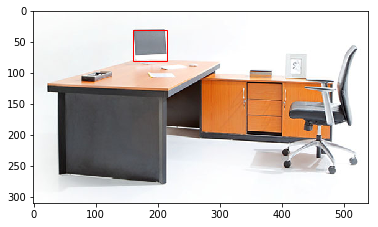

chair   box points : [401  48 526 246]


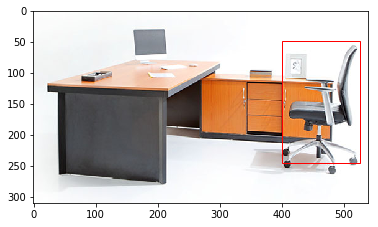

In [25]:
for eachobj in detections:
    print(eachobj['name'], "  box points :", eachobj['box_points'])
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(office1)
    # Create a Rectangle patch
    rect = patches.Rectangle((eachobj['box_points'][0],eachobj['box_points'][1]),eachobj['box_points'][2]-eachobj['box_points'][0],eachobj['box_points'][3]-eachobj['box_points'][1],linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()

chair   box points : [401  48 526 246]


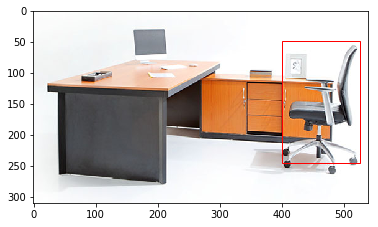

In [29]:
# Replacing the chair from above image with new chair 
obj = detections[1]
print(obj['name'], "  box points :", obj['box_points'])
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(office1)
# Create a Rectangle patch
rect = patches.Rectangle((obj['box_points'][0],obj['box_points'][1]),
                         obj['box_points'][2]-obj['box_points'][0],
                         obj['box_points'][3]-obj['box_points'][1],
                         linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

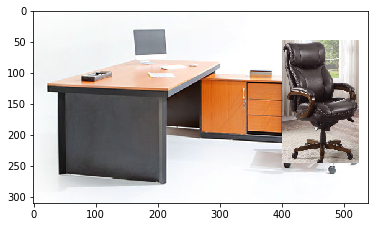

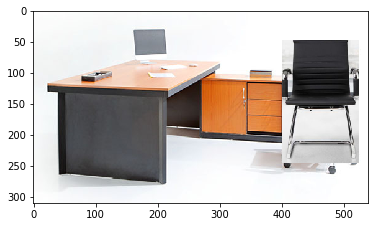

In [48]:
import numpy as np

temp = np.array(office1)

office1_chair =temp[48:246,401:526,:]

new_chair = chair2[123:926, 161:709]

new_chair1 = chair1[103:471, 113:333]

temp[48:246,401:526,:] = cv2.resize(new_chair, (office1_chair.shape[1],office1_chair.shape[0] ) )


plt.imsave('officeFurnitureReplaceChair1.jpg', temp)
plt.imshow(temp)
plt.show()

# Now replacing the chair in office with chair 2
temp1 = np.array(office1)

office1_chair = temp[48:246,401:526,:]

new_chair1 = chair1[103:471, 113:333]

temp[48:246,401:526,:] = cv2.resize(new_chair1, (office1_chair.shape[1],office1_chair.shape[0] ) )


plt.imsave('officeFurnitureReplaceChair2.jpg', temp)
plt.imshow(temp)
plt.show()
